In [1]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25892 sha256=4b38cf3aa589f20ccdc9a6284b6c66fc5080f90b7e4c065d77c8a4f44ee9c442
  Stored in directory: c:\users\cheku\appdata\local\pip\cache\wheels\85\cf\3a\e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


  DEPRECATION: Building 'imutils' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'imutils'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [14]:
from imutils import paths
import os
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split

import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology
import time

import keras,math
from keras.applications.inception_v3 import InceptionV3 
from keras.layers import GlobalAveragePooling2D,BatchNormalization
from keras.layers import Dense,Dropout
from keras.models import Model

import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

import tensorflow as tf
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics

In [15]:
!mkdir /tmp/prepared_data/

!mkdir /tmp/prepared_data/benign
!mkdir /tmp/prepared_data/PreB
!mkdir /tmp/prepared_data/ProB
!mkdir /tmp/prepared_data/EarlyPreB

!mkdir /tmp/prepared_test/

!mkdir /tmp/prepared_test/benign
!mkdir /tmp/prepared_test/PreB
!mkdir /tmp/prepared_test/ProB
!mkdir /tmp/prepared_test/EarlyPreB

The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.


In [4]:
data_dir  = r'C:\Users\cheku\Desktop\New folder (4)\blood cell dataset'
data_list = sorted(list(paths.list_images(data_dir)))

random.seed(88)
random.shuffle(data_list)

train_list, test_list = train_test_split(data_list, train_size=0.90, shuffle=True, random_state=88)

print('number of testing list -:',len(test_list))
print('number of training list-:',len(train_list))

number of testing list -: 325
number of training list-: 2917


In [9]:
print('Number of samples in dataset:',len(list(paths.list_images(r"C:\Users\cheku\Desktop\New folder (4)\blood cell dataset"))),'\n')

print('Number of samples in each class:','\n')
print("#1 Benign ---------------:", len(list(paths.list_images(r"C:\Users\cheku\Desktop\New folder (4)\blood cell dataset\Benign"))))
print("#2 Malignant[Early PreB] :", len(list(paths.list_images(r"C:\Users\cheku\Desktop\New folder (4)\blood cell dataset\[Malignant] early Pre-B"))))
print("#3 Malignant[PreB] ------:", len(list(paths.list_images(r"C:\Users\cheku\Desktop\New folder (4)\blood cell dataset\[Malignant] Pre-B"))))
print("#4 Malignant[ProB] ------:", len(list(paths.list_images(r"C:\Users\cheku\Desktop\New folder (4)\blood cell dataset\[Malignant] Pro-B"))))

Number of samples in dataset: 3242 

Number of samples in each class: 

#1 Benign ---------------: 512
#2 Malignant[Early PreB] : 979
#3 Malignant[PreB] ------: 955
#4 Malignant[ProB] ------: 796


In [ ]:
import os
import cv2

p = 0

# Loop through all images
for img in test_list:
    i = cv2.imread(img)
    if i is None:
        print(f"Warning: Couldn't read image {img}")
        continue

    i = cv2.resize(i, (224, 224))
    
    # Extract label from the path (assumed 4th folder from root)
    label = img.split(os.path.sep)[5]  # Adjusted index to match full Windows path

    # Define destination subfolder based on label
    if label == "Benign":
        subfolder = "benign"
    elif label == "[Malignant] early Pre-B":
        subfolder = "EarlyPreB"
    elif label == "[Malignant] Pre-B":
        subfolder = "PreB"
    elif label == "[Malignant] Pro-B":
        subfolder = "ProB"
        
    else:
        print(f"Unknown label: {label}, skipping...")
        continue

    # Build full path
    save_path = r'C:\Users\cheku\Desktop\New folder (4)\blood cell dataset'

    # Ensure target directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Save image
    cv2.imwrite(save_path, i)
    p += 1


Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label: blood cell dataset, skipping...
Unknown label

In [28]:
p = 0
tic = time.perf_counter()

for img in train_list:
    i = cv2.imread(img)
    if i is None:
        print(f"Warning: Couldn't read image: {img}")
        continue

    i = cv2.resize(i, (224, 224))

    # ✅ Fix: extract label from correct folder level
    label = img.split(os.path.sep)[6]

    # Determine subfolder name
    if label == "Benign":
        subfolder = "benign"
    elif label == "[Malignant] Pre-B":
        subfolder = "PreB"
    elif label == "[Malignant] Pro-B":
        subfolder = "ProB"
    elif label == "[Malignant] early Pre-B":
        subfolder = "EarlyPreB"
    else:
        print(f"Unknown label: {label}, skipping...")
        continue

    # Make directory and save original image
    folder_path = os.path.join(r"C:\Users\cheku\Desktop\New folder (4)\blood cell dataset", subfolder)
    os.makedirs(folder_path, exist_ok=True)
    original_filename = os.path.join(folder_path, f"{label}_{p}_orig.png")
    cv2.imwrite(original_filename, i)

    # -------- Segmentation ---------
    i_rgb = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    i_lab = cv2.cvtColor(i_rgb, cv2.COLOR_RGB2LAB)
    _, a, _ = cv2.split(i_lab)
    i2 = a.reshape(-1, 1)
    km = KMeans(n_clusters=7, random_state=0, n_init=10).fit(i2)
    clustered = km.cluster_centers_[km.labels_].reshape(a.shape)
    clustered = clustered.astype(np.uint8)

    _, t = cv2.threshold(clustered, 141, 255, cv2.THRESH_BINARY)
    fh = ndi.binary_fill_holes(t)
    m1 = morphology.remove_small_objects(fh, 200)
    m2 = morphology.remove_small_holes(m1, 250)
    m2 = m2.astype(np.uint8)

    out = cv2.bitwise_and(i_rgb, i_rgb, mask=m2)
    out_bgr = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)

    segmented_filename = os.path.join(folder_path, f"{label}_{p}_seg.png")
    cv2.imwrite(segmented_filename, out_bgr)

    p += 1

toc2 = time.perf_counter()
print(f"{p} samples processed in { ((toc2 - tic)/60):.2f} minutes")

2917 samples processed in 17.13 minutes


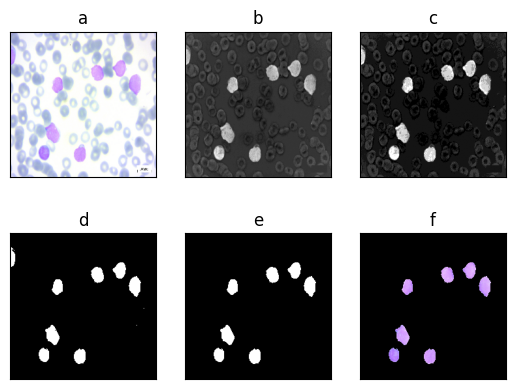

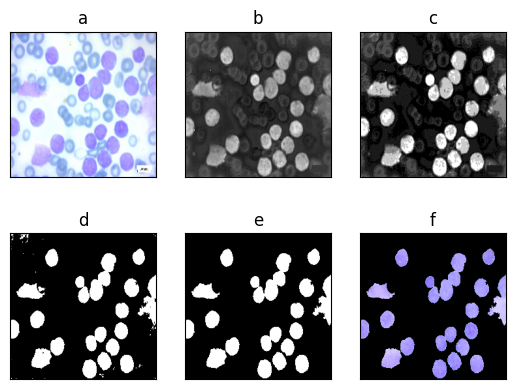

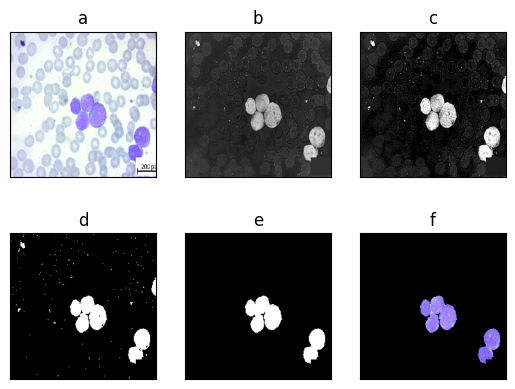

In [29]:
n= 3

o_img=[]
a_img=[]
c_img=[]
b_img=[]
m_img=[]
out_img=[]

random.seed(865)
random.shuffle(data_list)

for img in data_list[:n]:
    i= cv2.imread(img)    
    i= cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    i= cv2.resize(i,(224,224))
    o_img.append(i)
    i_lab = cv2.cvtColor(i, cv2.COLOR_RGB2LAB)
    l,a,b = cv2.split(i_lab)
    a_img.append(a)
    i2 = a.reshape(a.shape[0]*a.shape[1],1)
    km = KMeans(n_clusters=7, random_state=0, n_init=10).fit(i2)
    p2s= km.cluster_centers_[km.labels_]
    ic= p2s.reshape(a.shape[0],a.shape[1])
    ic = ic.astype(np.uint8)
    c_img.append(ic)
    r,t = cv2.threshold(ic,141,255 ,cv2.THRESH_BINARY)
    b_img.append(t)    
    fh = ndi.binary_fill_holes(t)   
    m1 = morphology.remove_small_objects(fh, 200)
    m2 = morphology.remove_small_holes(m1,250)
    #m2 = ndi.binary_fill_holes(m2)  
    #m1 = m1.astype(np.uint8)
    #m1_imgs.append(m1)
    m2 = m2.astype(np.uint8)  
    m_img.append(m2)
    out = cv2.bitwise_and(i, i, mask=m2)
    out_img.append(out)
    
for j in range(n):    
    for t in range(1):
        #print('=>',j+1,':')
        plt.subplot(2,3,1+t),plt.imshow(o_img[j])
        plt.title('a'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,2+t),plt.imshow(a_img[j],'gray')
        plt.title('b'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,3+t),plt.imshow(c_img[j],'gray')
        plt.title('c'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,4+t),plt.imshow(b_img[j],'gray')
        plt.title('d'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,5+t),plt.imshow(m_img[j],'gray')
        plt.title('e'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,6+t),plt.imshow(out_img[j])
        plt.title('f'),plt.xticks([]),plt.yticks([])
    plt.show()  


In [30]:
import os
import random
import pandas as pd
from imutils import paths

prepared_data_path = r'C:\Users\cheku\Desktop\New folder (4)\blood cell dataset'
prepared_data_list_filenames = sorted(list(paths.list_images(prepared_data_path)))
random.shuffle(prepared_data_list_filenames)
prepared_data_list_labels = []

# FIX: use index 6 to get the label folder name
for line in prepared_data_list_filenames:
    label = line.split(os.path.sep)[6]
    prepared_data_list_labels.append(label)

# Create DataFrame
I_series = pd.Series(prepared_data_list_filenames, name='filenames')
L_series = pd.Series(prepared_data_list_labels, name='labels')
test_df = pd.concat([I_series, L_series], axis=1)

# Show dataframe and label counts
print('-- test DataFrame --')
print(test_df.head())
print('\n-- Label Counts --')
print(test_df['labels'].value_counts())

-- test DataFrame --
                                           filenames             labels
0  C:\Users\cheku\Desktop\New folder (4)\blood ce...          EarlyPreB
1  C:\Users\cheku\Desktop\New folder (4)\blood ce...               ProB
2  C:\Users\cheku\Desktop\New folder (4)\blood ce...             Benign
3  C:\Users\cheku\Desktop\New folder (4)\blood ce...  [Malignant] Pro-B
4  C:\Users\cheku\Desktop\New folder (4)\blood ce...             Benign

-- Label Counts --
labels
EarlyPreB                  1736
PreB                       1724
Benign                     1450
ProB                       1436
[Malignant] early Pre-B     979
[Malignant] Pre-B           955
[Malignant] Pro-B           796
Name: count, dtype: int64


In [31]:
import os
import random
import pandas as pd
from imutils import paths

# Set your dataset path
prepared_data_path = r'C:\Users\cheku\Desktop\New folder (4)\blood cell dataset'

# Load and shuffle image paths
prepared_data_list_filenames = sorted(list(paths.list_images(prepared_data_path)))
random.shuffle(prepared_data_list_filenames)

# Extract labels correctly from path
prepared_data_list_labels = []
for line in prepared_data_list_filenames:
    label = line.split(os.path.sep)[6]  # index 6 = label folder
    prepared_data_list_labels.append(label)

# Build DataFrame
I_series = pd.Series(prepared_data_list_filenames, name='filenames')
L_series = pd.Series(prepared_data_list_labels, name='labels')
df = pd.concat([I_series, L_series], axis=1)

# Print output
print('-- train/valid DataFrame --')
print(df.head())

# Print number of samples per class
print('\n-- Label Counts --')
print(df['labels'].value_counts())

-- train/valid DataFrame --
                                           filenames                   labels
0  C:\Users\cheku\Desktop\New folder (4)\blood ce...                     PreB
1  C:\Users\cheku\Desktop\New folder (4)\blood ce...                EarlyPreB
2  C:\Users\cheku\Desktop\New folder (4)\blood ce...  [Malignant] early Pre-B
3  C:\Users\cheku\Desktop\New folder (4)\blood ce...                     ProB
4  C:\Users\cheku\Desktop\New folder (4)\blood ce...  [Malignant] early Pre-B

-- Label Counts --
labels
EarlyPreB                  1736
PreB                       1724
Benign                     1450
ProB                       1436
[Malignant] early Pre-B     979
[Malignant] Pre-B           955
[Malignant] Pro-B           796
Name: count, dtype: int64


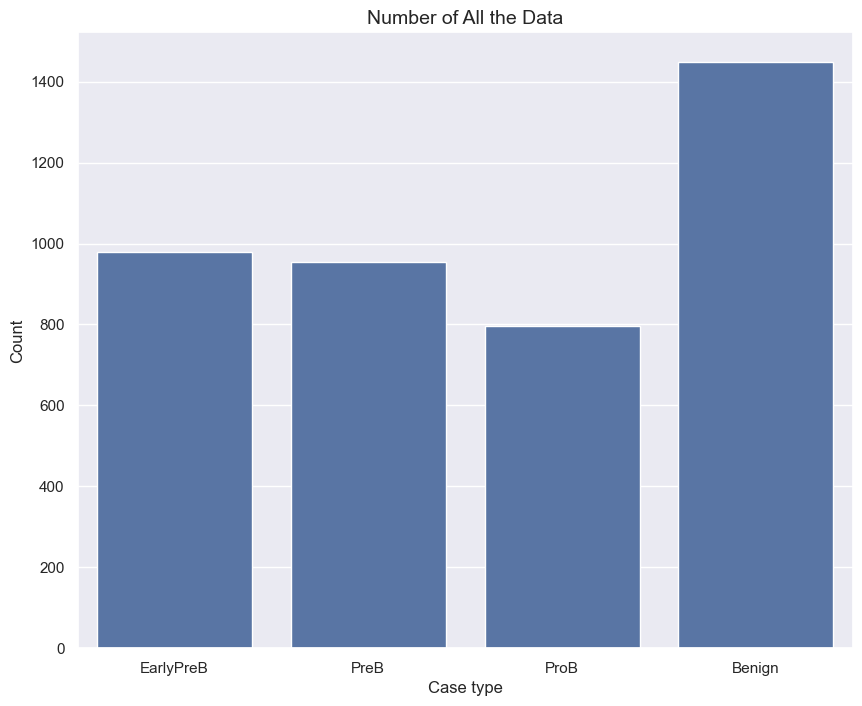

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: a = df['labels'].value_counts()
# Make sure label names match exactly with your dataset labels
a = df['labels'].value_counts()

# Create ordered list of your custom categories
label_order = ['[Malignant] early Pre-B', '[Malignant] Pre-B', '[Malignant] Pro-B', 'Benign']
counts = [a.get(label, 0) for label in label_order]  # safely get counts

sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.barplot(x=['EarlyPreB', 'PreB', 'ProB', 'Benign'], y=counts)
plt.title('Number of All the Data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [34]:
SPLIT= 0.90

TRAIN_DF, VALID_DF = train_test_split(df, train_size=SPLIT, shuffle=True, random_state=88)

print('Train samples: ', len(TRAIN_DF))
print('Valid samples: ', len(VALID_DF))
print('Test samples : ', len(test_df))

Train samples:  8168
Valid samples:  908
Test samples :  9076


In [35]:
test_df['labels'].value_counts()

labels
EarlyPreB                  1736
PreB                       1724
Benign                     1450
ProB                       1436
[Malignant] early Pre-B     979
[Malignant] Pre-B           955
[Malignant] Pro-B           796
Name: count, dtype: int64

In [36]:
BATCH_SIZE= 32
IMG_SHAPE= (224, 224, 3)
IMG_SIZE= (224, 224)

gen = ImageDataGenerator(rescale=1./255, 
                         vertical_flip=True,
                         horizontal_flip=True)
                         #rotation_range=10)

gen2 = ImageDataGenerator(rescale=1./255)

train_gen = gen.flow_from_dataframe(TRAIN_DF,
                                    x_col= 'filenames',
                                    y_col= 'labels',
                                    target_size= IMG_SIZE,
                                    class_mode= 'categorical',
                                    color_mode= 'rgb',
                                    shuffle= True,
                                    batch_size= BATCH_SIZE,
                                    seed=88
)

valid_gen= gen2.flow_from_dataframe(VALID_DF,
                                    x_col= 'filenames',
                                    y_col= 'labels',
                                    target_size= IMG_SIZE,
                                    class_mode= 'categorical',
                                    color_mode= 'rgb',
                                    shuffle= True,
                                    batch_size= BATCH_SIZE,
                                    seed=88
)
test_gen= gen2.flow_from_dataframe(test_df,
                                   x_col= 'filenames',
                                   y_col= 'labels',
                                   target_size= IMG_SIZE,
                                   class_mode= 'categorical',
                                   color_mode= 'rgb',
                                   shuffle= True,
                                   batch_size= 325,
                                   seed=88
)


STEPS= int( len(train_gen.labels)/BATCH_SIZE)
print(STEPS)

Found 8168 validated image filenames belonging to 7 classes.
Found 908 validated image filenames belonging to 7 classes.
Found 9076 validated image filenames belonging to 7 classes.
255


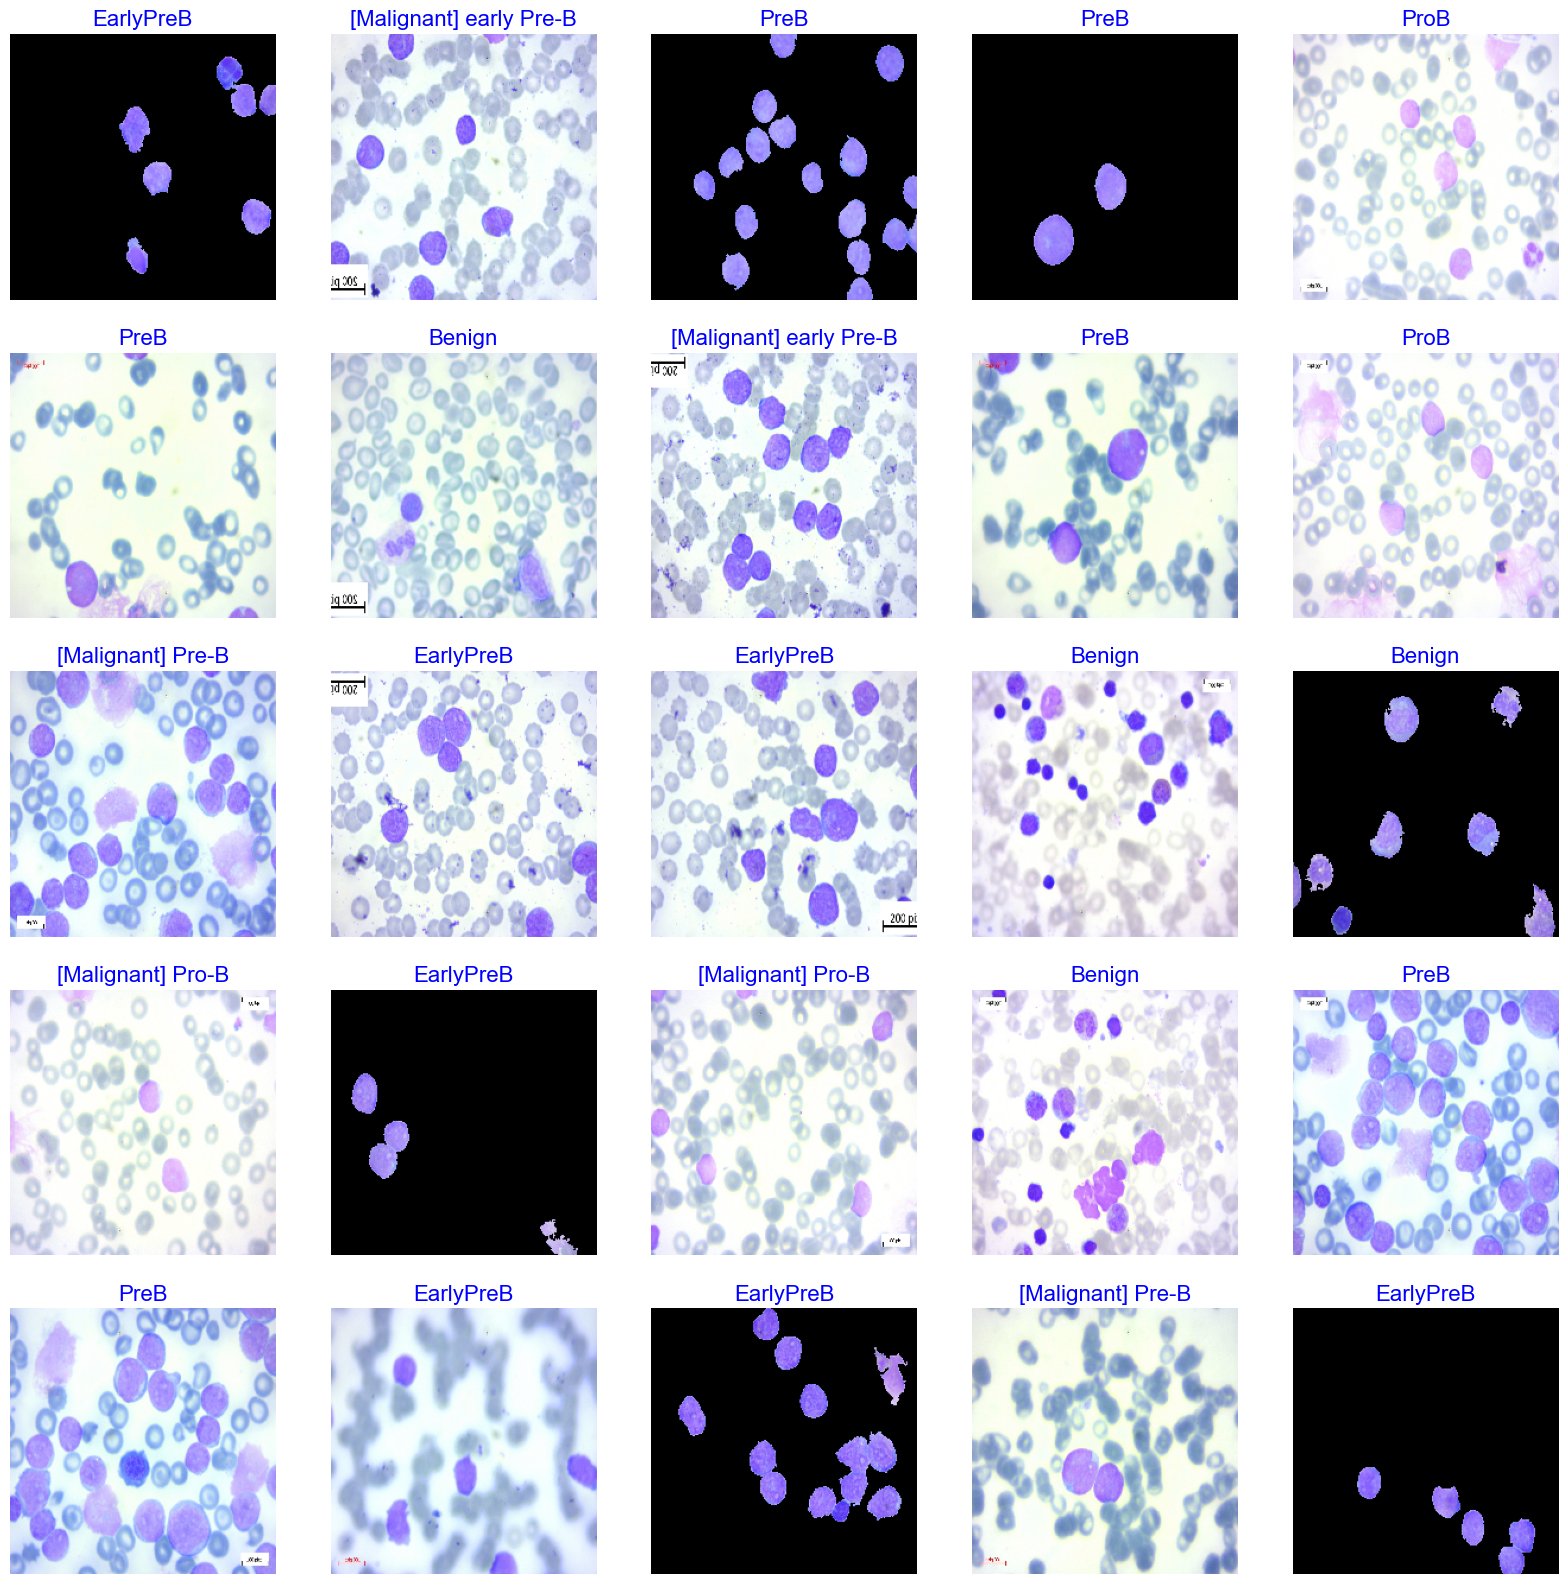

In [37]:
genn=train_gen
class_dictionary= genn.class_indices
class_names = list(class_dictionary.keys())
images, labels = next(genn) #get sample batch from the generator
plt.figure(figsize=(20,20))
length = len(labels)

if length<25:
    r=length
else:
    r=25

for i in range(r):
    plt.subplot(5, 5, i+1)
    image= (images[i])
    #image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    index=np.argmax(labels[i])
    class_name= class_names[index]
    plt.title(class_name, color='blue', fontsize=16)
    plt.axis('off')
plt.show()

In [38]:
#base_model = InceptionV3(include_top= False, weights="imagenet", input_shape=(224,224,3))
#base_model= tf.keras.applications.efficientnet.EfficientNetB0(include_top=False,weights='imagenet',input_shape=(224,224,3))
#tf.keras.applications.nasnet.NASNetLarge
#base_model= tf.keras.applications.nasnet.NASNetMobile(include_top=False,weights='imagenet',input_shape=(224,224,3))
base_model= tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,weights='imagenet',input_shape=(224,224,3))
#tf.keras.applications.MobileNetV3Small

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x) 
#x = Dense(128, activation= 'relu',kernel_initializer='he_uniform')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.3)(x)
predictions = Dense(4, activation= "softmax")(x) 
model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 37s 4us/step


In [39]:
print(base_model.input)
model.summary()

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,268,228 (8.65 MB)

 Trainable params: 2,231,556 (8.51 MB)

 Non-trainable params: 36,672 (143.25 KB)

In [48]:
train_dir = r'C:\Users\cheku\Desktop\New folder (4)\blood cell dataset'
valid_dir = r'C:\Users\cheku\Desktop\New folder (4)\blood cell dataset'

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set directories
train_dir = r'C:\Users\cheku\Desktop\New folder (4)\train'
valid_dir = r'C:\Users\cheku\Desktop\New folder (4)\valid'

# Create generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B']
)

valid_gen = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B']
)


Found 4180 images belonging to 4 classes.
Found 4180 images belonging to 4 classes.


Epoch 1/6
131/131 ━━━━━━━━━━━━━━━━━━━━ 593s 4s/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.3167 - val_loss: 6.7884
Epoch 2/6
131/131 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.4766 - val_loss: 3.5537
Epoch 3/6
131/131 ━━━━━━━━━━━━━━━━━━━━ 498s 4s/step - accuracy: 0.9979 - loss: 0.0067 - val_accuracy: 0.3541 - val_loss: 4.9914
Epoch 4/6
131/131 ━━━━━━━━━━━━━━━━━━━━ 512s 4s/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.5969 - val_loss: 2.2786
Epoch 5/6
131/131 ━━━━━━━━━━━━━━━━━━━━ 626s 5s/step - accuracy: 0.9988 - loss: 0.0057 - val_accuracy: 0.7194 - val_loss: 1.3545
Epoch 6/6
131/131 ━━━━━━━━━━━━━━━━━━━━ 573s 4s/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 0.7811 - val_loss: 0.9706


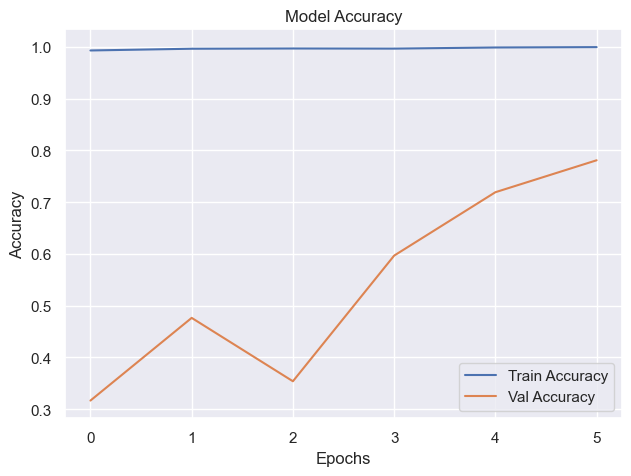

In [67]:
# 1. Learning rate schedule
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=40,
    decay_rate=0.96,
    staircase=False
)

# 2. Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(
        learning_rate=lr_schedule,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08
    ),
    metrics=['accuracy']
)

# 3. Fit the model
history = model.fit(
    x=train_gen,
    epochs=6,  # You can increase this later
    validation_data=valid_gen,
    steps_per_epoch=len(train_gen),
    validation_steps=len(valid_gen)
)

# 4. Plot accuracy/loss (optional but helpful)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define path
test_dir = r'C:\Users\cheku\Desktop\New folder (4)\test'

# ✅ Correct: create ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Now create the test generator
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    classes=['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B']
)


Found 4180 images belonging to 4 classes.


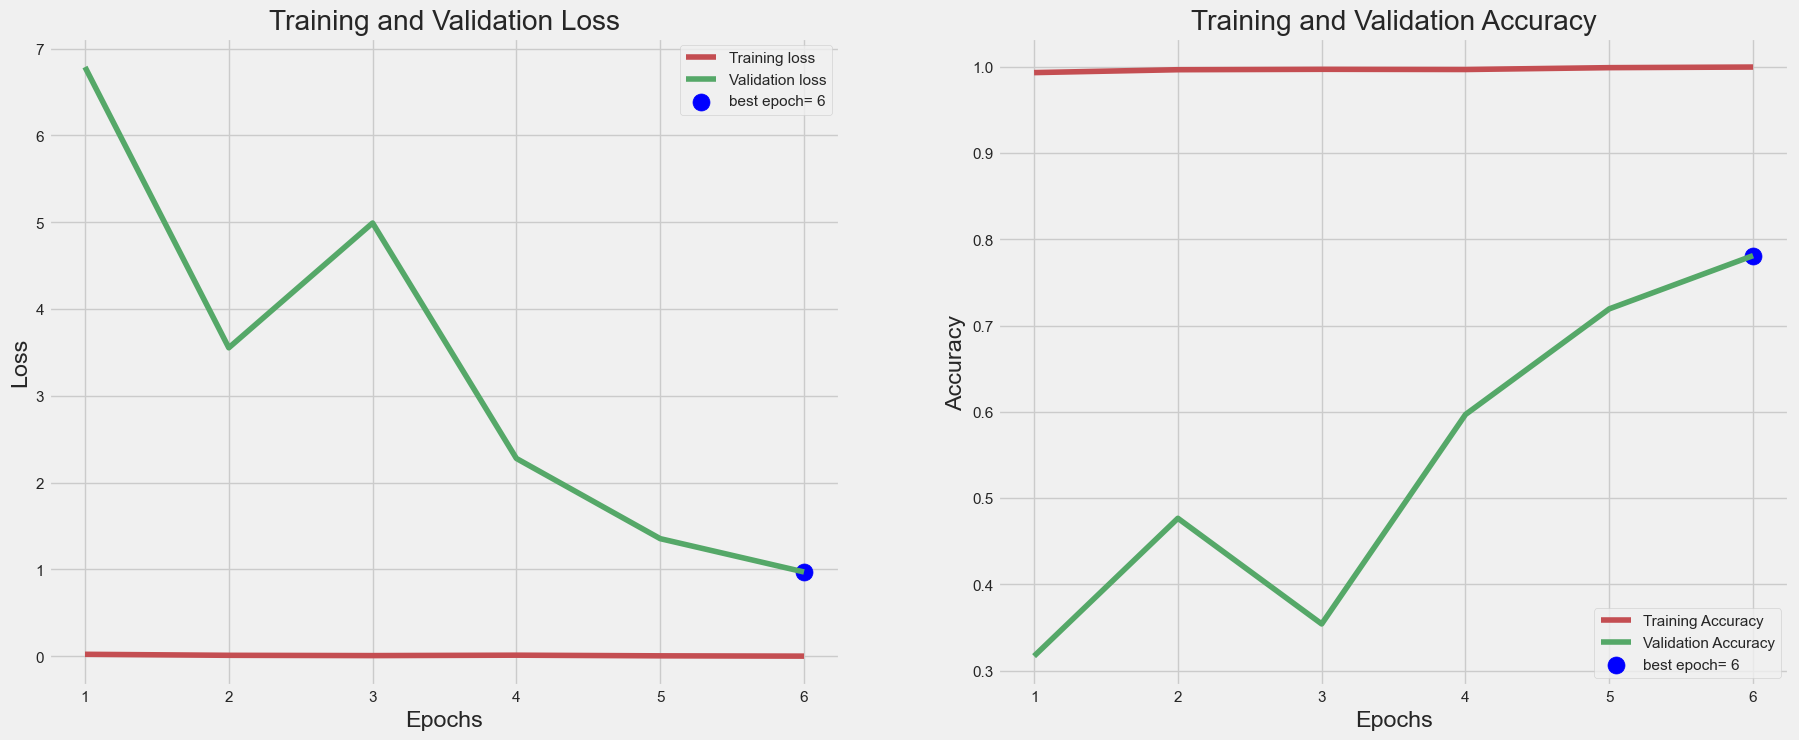

C:\Users\cheku\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 122s 935ms/step - accuracy: 0.8347 - loss: 0.7597
Model accuracy on test set: 78.11004519462585 (0, 255, 0) (55, 65, 80)


In [69]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()
    
    
tr_plot(history, 0)
acc=model.evaluate(test_gen,batch_size=32, steps=None, verbose=1)[1]*100
msg='Model accuracy on test set: ' + str(acc)
print(msg, (0,255,0), (55,65,80))

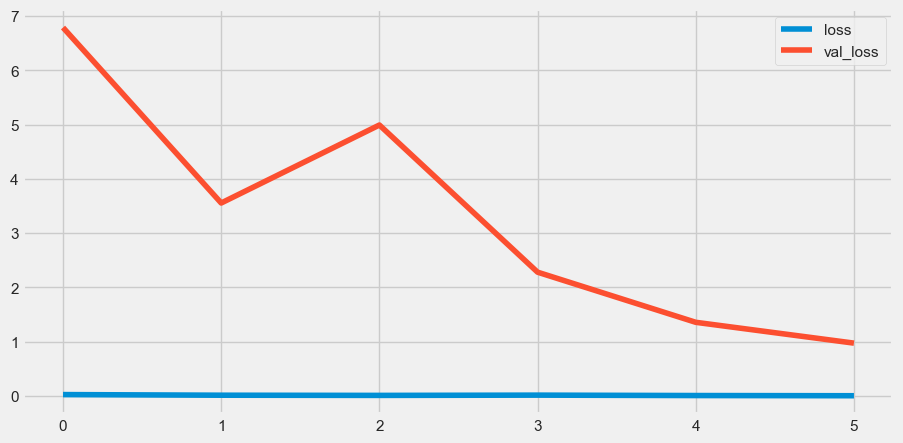

In [70]:
# Plotting train_loss vs val_loss
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()

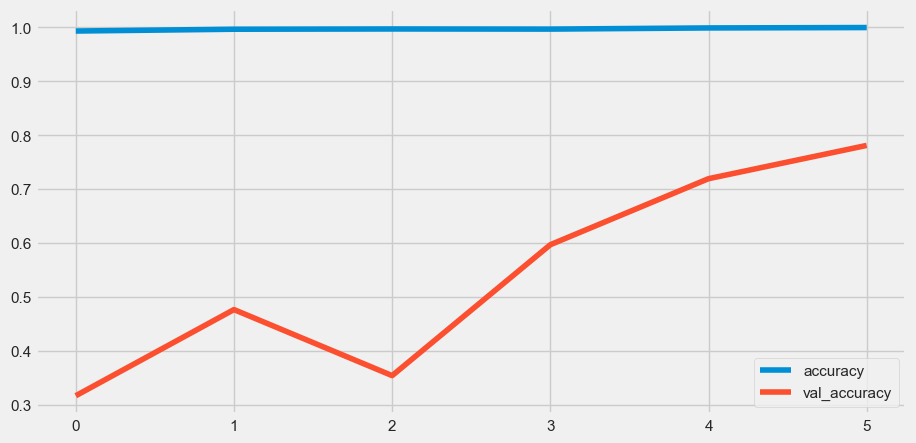

In [71]:
# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='lower right')

In [72]:
from sklearn.metrics import confusion_matrix


for X_batch, y_batch in test_gen:
    y_test = y_batch
    X_test = X_batch
    break
    
print('test label shape',y_test.shape)
print('test image shape',X_test.shape)
print('Evaluate on test-data:')
model.evaluate(X_test,y_test)

pred = model.predict(X_test)

bin_predict = np.argmax(pred,axis=1)
y_test = np.argmax(y_test,axis=1)


#Confusion matrix:
matrix = confusion_matrix(y_test, bin_predict)
print('Confusion Matrix:\n',matrix)

test label shape (32, 4)
test image shape (32, 224, 224, 3)
Evaluate on test-data:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step - accuracy: 1.0000 - loss: 0.0265
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix:
 [[32]]


C:\Users\cheku\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


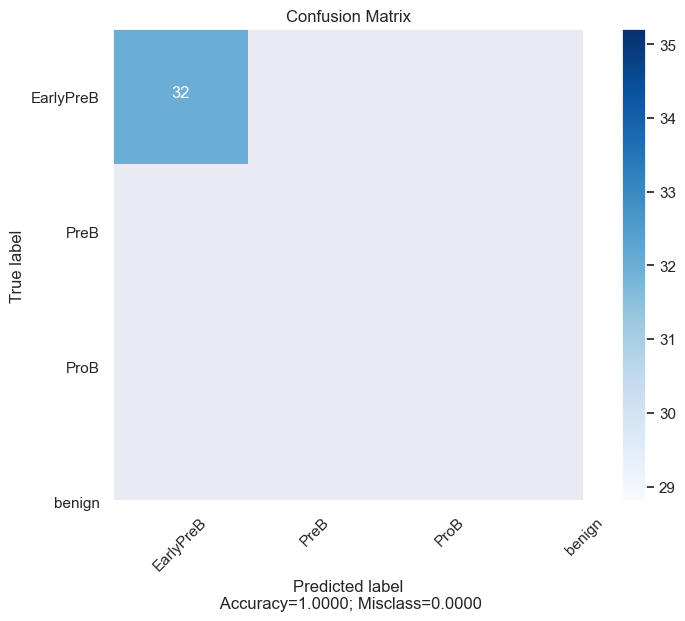

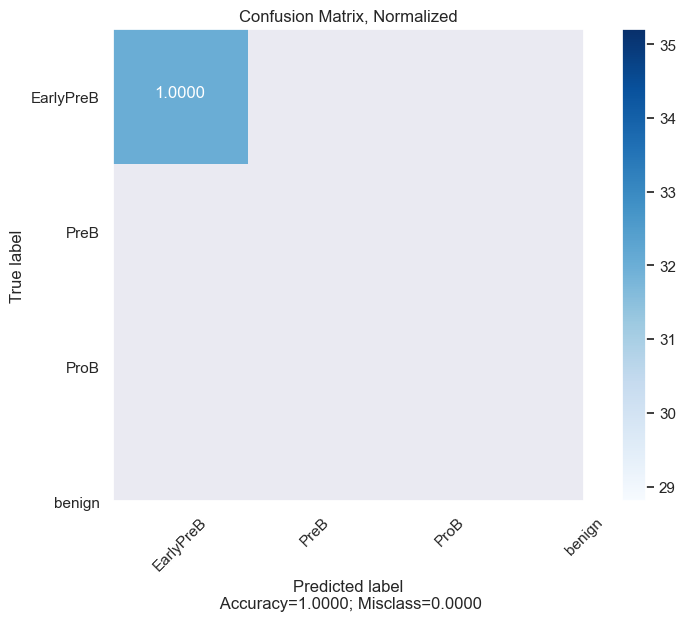

In [73]:
import itertools

#Plot the Confusion matrix:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    sns.set(style="dark")
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n Accuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

    
plot_confusion_matrix(cm           = np.array(matrix), 
                      normalize    = False,
                      target_names = ['EarlyPreB','PreB','ProB','benign'],
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = np.array(matrix), 
                      normalize    = True,
                      target_names = ['EarlyPreB','PreB','ProB','benign'],
                      title        = "Confusion Matrix, Normalized")

In [76]:
from sklearn import metrics

# Use the arrays directly
y_true = y_test
y_pred = bin_predict

# Generate the classification report
report = metrics.classification_report(
    y_true,
    y_pred,
    labels=[0, 1, 2, 3],  # class indices in order
    target_names=['EarlyPreB', 'PreB', 'ProB', 'benign']
)

print(report)

              precision    recall  f1-score   support

   EarlyPreB       1.00      1.00      1.00        32
        PreB       0.00      0.00      0.00         0
        ProB       0.00      0.00      0.00         0
      benign       0.00      0.00      0.00         0

    accuracy                           1.00        32
   macro avg       0.25      0.25      0.25        32
weighted avg       1.00      1.00      1.00        32



C:\Users\cheku\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cheku\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cheku\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

In [77]:
FP = matrix.sum(axis=0) - np.diag(matrix)
FN = matrix.sum(axis=1) - np.diag(matrix)
TP = np.diag(matrix)
TN = matrix[:].sum() - (FP + FN + TP)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)

ACC = (TP+TN)/(TP+FP+FN+TN)

print('Other Metrics:')
MAE = mean_absolute_error(y_test, bin_predict)

print('MAE ----------------------------------------------:', MAE)
print('Accuracy -----------------------------------------:', ACC)
print('Precision (positive predictive value)-------------:', PPV)
print('Recall (Sensitivity, hit rate, true positive rate):', TPR)
print('Specificity (true negative rate)------------------:', TNR)
print('Negative Predictive Value-------------------------:', NPV)
print('Fall out (false positive rate)--------------------:', FPR)
print('False Negative Rate-------------------------------:', FNR)
print('False discovery rate------------------------------:', FDR)

Other Metrics:
MAE ----------------------------------------------: 0.0
Accuracy -----------------------------------------: [1.]
Precision (positive predictive value)-------------: [1.]
Recall (Sensitivity, hit rate, true positive rate): [1.]
Specificity (true negative rate)------------------: [nan]
Negative Predictive Value-------------------------: [nan]
Fall out (false positive rate)--------------------: [nan]
False Negative Rate-------------------------------: [0.]
False discovery rate------------------------------: [0.]


C:\Users\cheku\AppData\Local\Temp\ipykernel_4644\2609339168.py:7: RuntimeWarning: invalid value encountered in divide
  TNR = TN/(TN+FP)
C:\Users\cheku\AppData\Local\Temp\ipykernel_4644\2609339168.py:9: RuntimeWarning: invalid value encountered in divide
  NPV = TN/(TN+FN)
C:\Users\cheku\AppData\Local\Temp\ipykernel_4644\2609339168.py:10: RuntimeWarning: invalid value encountered in divide
  FPR = FP/(FP+TN)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
Shape of preds:  (32, 4)


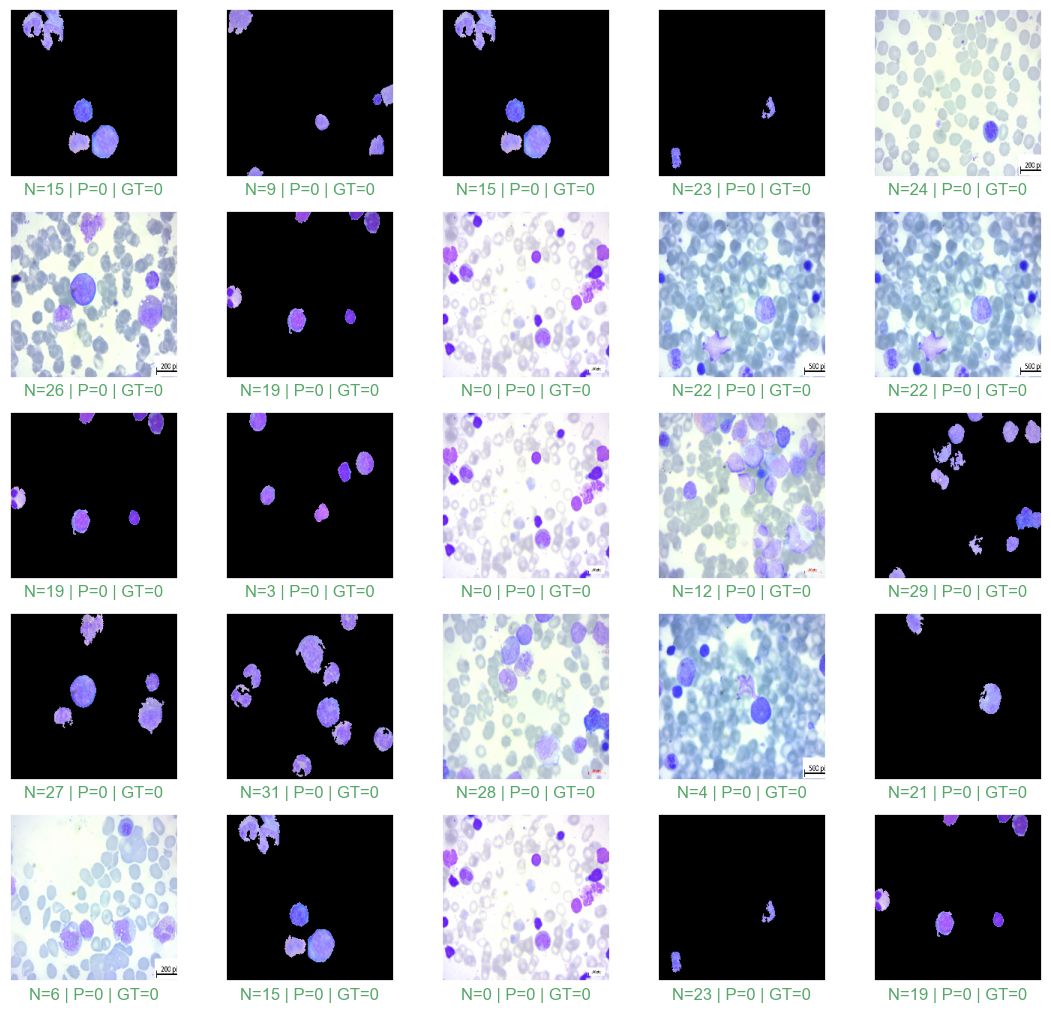

In [78]:
preds = model.predict(X_test)
#print(preds)
print('Shape of preds: ', preds.shape)
plt.figure(figsize = (12, 12))

number = np.random.choice(preds.shape[0])

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    number = np.random.choice(preds.shape[0])
    pred = np.argmax(preds[number])
    actual = (y_test[number])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('N={} | P={} | GT={}'.format(number, pred, actual), color = col) #N= number P= prediction GT= actual (ground truth)
    image= X_test[number]#cv2.cvtColor(X_test[number], cv2.COLOR_BGR2RGB)
    plt.imshow(((image* 255).astype(np.uint8)), cmap='binary')
plt.show()

In [88]:
import os

# Ensure the directory exists
output_dir = r'C:\Users\cheku\Desktop\New folder (4)'
os.makedirs(output_dir, exist_ok=True)

# Save the TFLite model
tflite_path = os.path.join(output_dir, 'model4.tflite')
with open(tflite_path, 'wb') as f:
    f.write(tfmodel)
print(f"TFLite model saved to {tflite_path}")

TFLite model saved to C:\Users\cheku\Desktop\New folder (4)\model4.tflite


In [90]:
import os
os.chdir(r'C:\Users\cheku\Desktop\New folder (4)')
from IPython.display import FileLink
FileLink(r'C:\Users\cheku\Desktop\New folder (4)\model4.tflite')

C:\Users\cheku\Desktop\New folder (4)\model4.tflite